# Operator Inference Example for Burger's Equation

F, BThe Burger's equation or Bateman-Burger's equation is a second order PDE used widely in many fields as a simplified model, for example, fluid mechanics, acoustics, etc. The state $v(x,t)$ is a velocity field consisting of the spatial and temporal variables. The PDE is expressed as 

$$
v_t + vv_x - \mu v_{xx} = 0
$$

where 

$$
\begin{align}
v_t &= \frac{\partial v(t,x)}{\partial t} \\
v_x &= \frac{\partial v(t,x)}{\partial x} \\
v_{xx} &= \frac{\partial^2 v(t,x)}{\partial x^2}
\end{align}
$$

and $\mu$ is the viscosity parameter. In order to discretize this equation in terms of the spatial domain to obtain multiple ODEs that we can numerically integrate we use the finite difference approach. Let $k = \{1,2,3,\ldots,K\} \in \mathbb{Z}^+$ and $j = \{0, 1,2,3,\ldots,J\}\in\mathbb{Z}^+$. Further let $v^k_j$ indicate the state $v$ at the $k$-th discrete time and $j$-th discrete spatial point. With this discrete expression we can express $v_t$, $v_x$, and $v_{xx}$ as follows.

$$
\begin{align}
v_t &= \frac{\partial v(t_k,x_j)}{\partial t} = \frac{v^{k+1}_j - v^k_j}{\Delta t} + \mathcal{O}(\Delta t) \\
v_x &= \frac{\partial v(t_k,x_j)}{\partial t} = \frac{v^{k}_{j+1} - v^k_{j-1}}{2\Delta x} + \mathcal{O}(\Delta x) \\
v_{xx} &= \frac{\partial^2 v(t_k,x_j)}{\partial x^2} = \frac{v^k_{j+1} - 2v^k_j + v^k_{j-1}}{\Delta x^2} + \mathcal{O}(\Delta x^2)
\end{align}
$$

For $v_t$ we use the standard first order finite difference, and for $v_{xx}$ we use the second order central finite difference and since we will implement the semi-implicit integration (backward Euler for only this term without the viscid term). Now, if we look carefully, we see that for $v_x$ we use the leap-frog finite difference where we jump from the $(j+1)$-th term to the $(j-1)$-th term. Now if we plug in the above expressions to the governing PDE we have 

$$
\begin{gather}
    \frac{v^{k+1}_j - v^k_j}{\Delta t}  =  \mu\frac{v^{k+1}_{j+1} - 2v^{k+1}_j + v^{k+1}_{j-1}}{\Delta x^2} + v_j^k \frac{- v^k_{j+1} + v^k_{j-1}}{2\Delta x}
\end{gather}
$$

From this, we can form the system matrices, but keep in mind that for the Burger's equation we include the boundary conditions in the $A$ and $F$ matrix unlike the 1D heat equation example. We have

$$
\begin{gather}
A = \frac{\mu}{\Delta x^2} \begin{bmatrix}
\frac{\Delta x^2}{\mu}\left( -\frac{1}{\Delta t} \right) & 0 & 0 & 0 & 0 & \cdots & 0 & 0\\
1 & -2 & 1 & 0 & 0 & \cdots & 0 & 0\\
0 & 1 & -2 & 1 & 0 & \cdots & 0 & 0\\
0 & 0 & 1 & -2 & 1 & \cdots & 0 & 0\\
0 & 0 & 0 & 1 & -2 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots &\vdots \\
0 & 0 & 0 & 0 & 0 & \cdots & -2 & 1 \\
0 & 0 & 0 & 0 & 0 & \cdots & 0 & \frac{\Delta x^2}{\mu} \left( -\frac{1}{\Delta t} \right)
\end{bmatrix}
\end{gather}
$$

and 

$$
\begin{gather}
B = \begin{bmatrix}
\frac{1}{\Delta t} \\[0.5em] 0 \\ \vdots \\ 0 \\[0.5em] -\frac{1}{\Delta t}
\end{bmatrix}
\end{gather}
$$

In $A$, besides the first and last rows, we have a tridiagonal toeplitz matrix formed by the stencil $\{1,-2, 1\}$. However, the first and last rows of matrices $A$ and $B$ construct the finite difference at the boundaries, viz. 

$$
\begin{align}
    \dot v_0 &= \frac{v_0^{k+1} - v_0^k}{\Delta t} \\
    \dot v_J &= \frac{v_J^{k+1} - v_J^k}{\Delta t} 
\end{align}
$$

given that the Dirichlet boundary condition for our setup is $v_0^k = u(t)$, $v_{J}^k = -u(t)$.

The $F$ matrix is a bit tricky to wrap your mind around. So let's go through by examples. First, let $v_i \in \mathbb{R}^3$ where $i = \{0,1,2\}$, then 

$$
\begin{gather}
v^{(2)} = \begin{bmatrix}
    v_0^2 & v_1v_0 & v_2v_0 & v_1^2 & v_2v_1 & v_2^2 
\end{bmatrix}^\top
\end{gather}
$$

and 

$$
\begin{gather}
    F = \frac{1}{2\Delta x} \begin{bmatrix}
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & -1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
\end{gather}
$$

where each column of $F$ corresponds to the row of $v^{(2)}$. Note that this is different from the paper since this order follows the mathematical definition of the vectorization and half-vectorization operator. Further, because we include the boundary conditions the first and last row becomes all zeros. Similarly, for $v_i \in \mathbb{R}^4$ where $i = \{0,1,2,3\}$, then 

$$
\begin{gather}
v^{(2)} = \begin{bmatrix}
    v_0^2 & v_1v_0 & v_2v_0 & v_3v_0 & v_1^2 & v_2v_1 & v_3v_1 & v_2^2 & v_3v_2 & v_3^2
\end{bmatrix}^\top
\end{gather}
$$

and 

$$
\begin{gather}
    F = \frac{1}{2\Delta x} \begin{bmatrix}
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & -1 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
\end{gather}
$$
    
where each column of $F$ corresponds to the row of $v^{(2)}$. Note that the sequence which represents the row with nonzero entries in the $F$ matrix can be represented as 

$$
\begin{gather}
    \begin{cases}
        a_1 = 2 \\
        a_{n+1} = a_n + N - n + 1
    \end{cases}
\end{gather}
$$

where $N$ is the total number of variables, which is then

$$
\begin{align}
    a_n &= a_1 + \sum_{k=1}^{n-1}(N - k + 1) \\
    &= 2 - \frac{1}{2}n(n-1) + (N+1)(n-1) 
\end{align}
$$


Thus we have

$$
\begin{gather}
\vec{v}^{k+1} = (I - \Delta t A)^{-1}\left(\vec{v}^k + \Delta tF\left(\vec{v}^k\right)^{(2)} + \Delta t B\vec{u}\right).
\end{gather}
$$

and 

$$
\dot{\vec{v}} = A\vec{v} + F\vec{v}^{(2)} + B\vec{u}
$$

**NOTE**

How do we compute the intrusive $\hat{\mathrm{F}}$ matrix? Mathematically speaking, the quadratic term $(\cdot)^{(2)}$ can be represented as the [half-vectorization](https://en.wikipedia.org/wiki/Vectorization_(mathematics)?oldformat=true#Half-vectorization) of the outer/tensor product of $v$. Then

$$
\begin{gather}
    v^{(2)} = \textrm{vech}(vv^\top) = \mathrm{L}_N\textrm{vec}(vv^\top)
\end{gather}
$$

where $v\in\mathbb{R}^N$ and $\mathrm{L}_N \in \mathbb{R}^{N(N+1)/2 \times N^2}$. Here we used the relationship between the half-vectorization and vectorization with the [elimination matrix](https://en.wikipedia.org/w/index.php?title=Duplication_and_elimination_matrices&oldformat=true), $\mathrm{L}_N$ which is $\textrm{vech}(a) = \mathrm{L}_N\textrm{vec}(a)$. Now, for the intrusive model the original state can be approximated using the POD basis with order $r$ as $v = \mathrm{V}_r\hat{v}$. If we plug this into the above we have

$$
\begin{gather}
    v^{(2)} = \mathrm{L}_N\textrm{vec}\left(\mathrm{V}_r\hat{v}\hat{v}^\top\mathrm{V}_r^\top\right)
\end{gather}
$$

Now if we use one of the properties of the vectorization operator 

$$
\begin{gather}
    \textrm{vec}(\mathrm{AXB}) = (\mathrm{B}^\top \hat{\otimes} \mathrm{A})\textrm{vec}(\mathrm{X})
\end{gather}
$$

where $\hat{\otimes}$ indicates the Kronecker product operation. Then

$$
\begin{gather}
    v^{(2)} = \mathrm{L}_N\textrm{vec}\left(\mathrm{V}_r\hat{v}\hat{v}^\top\mathrm{V}_r^\top\right) = \mathrm{L}_N\left(\mathrm{V}_r\hat{\otimes} \mathrm{V}_r\right)\textrm{vec}\left(\hat{v}\hat{v}^\top\right)
\end{gather}
$$

Now to reverse the vectorization operator back to the half-vectorization operator we can make use of the [duplication matrix](https://en.wikipedia.org/w/index.php?title=Duplication_and_elimination_matrices&oldformat=true), $\mathrm{D}_m \in \mathbb{R}^{m^2\times m(m+1)/2}$ which allows the following proposition

$$
\begin{gather}
    \textrm{vec}(A) = \mathrm{D}_m\textrm{vech}(A)
\end{gather}
$$

where $A\in\mathbb{R}^{m\times m}$ and $A = A^\top$. Thus, the final result becomes

$$
\begin{gather}
    v^{(2)} = \mathrm{L}_N\left(\mathrm{V}_r \hat{\otimes} \mathrm{V}_r\right)\mathrm{D}_r\cdot \textrm{vech}\left(\hat{v}\hat{v}^\top\right) \\
    \therefore v^{(2)} = \mathrm{L}_N\left(\mathrm{V}_r \hat{\otimes} \mathrm{V}_r\right)\mathrm{D}_r\cdot \hat{v}^{(2)}
\end{gather}
$$

since $\hat{v}\in\mathbb{R}^r$. Then from the Galerkin projection we have the final result 

$$
\begin{gather}
    \hat{\mathrm{F}} = \mathrm{V}_r^\top \mathrm{FL}_N\left(\mathrm{V}_r \hat{\otimes} \mathrm{V}_r \right) \mathrm{D}_r.
\end{gather}
$$

One more note. If we use the $H \in \mathbb{R}^{N\times N^2}$ matrix which corresponds to the $(\mathrm{v} \hat{\otimes} \mathrm{v})$ vector the intrusive operator is a bit straightforward.

$$
\begin{align}
    \hat{\mathrm{H}}(\hat{\mathrm{v}}\otimes\hat{\mathrm{v}}) &= \mathrm{V}_r^\top \mathrm{H}(\mathrm{V}_r\hat{\mathrm{v}} \hat{\otimes} \mathrm{V}_r\hat{\mathrm{v}})\\
    &= \mathrm{V}_r^\top \mathrm{H}(\mathrm{V}_r\hat{\otimes}\mathrm{V}_r)(\hat{\mathrm{v}} \hat{\otimes} \hat{\mathrm{v}})
\end{align}
$$

Thus, 

$$
\begin{gather}
    \hat{\mathrm{H}} = \mathrm{V}_r^\top \mathrm{H}(\mathrm{V}_r\hat{\otimes}\mathrm{V}_r)
\end{gather}
$$

This leads to one proposition. If $\mathrm{H}\in\mathbb{R}^{N\times N^2}$ and $\mathrm{F}\in\mathbb{R}^{N\times N(N+1)/2}$. Then

$$
\begin{gather}
    \mathrm{H} = FL_N  \hspace{0.5in} \textrm{ or }  \hspace{0.5in} \mathrm{F} = HD_N
\end{gather}
$$

## Initial Setup

In [1]:
using CairoMakie
using DataFrames
using LinearAlgebra
using Plots
using ProgressMeter
using Random
using Statistics
using LiftAndLearn
const LnL = LiftAndLearn

Ω = (0.0, 1.0)
Nx = 2^7; dt = 1e-4
burger = LnL.BurgersModel(
    spatial_domain=Ω, time_domain=(0.0, 1.0), Δx=(Ω[2] + 1/Nx)/Nx, Δt=dt,
    diffusion_coeffs=range(0.1, 1.0, length=10), BC=:dirichlet,
);

## Least Squares Solution

In [2]:
num_inputs = 10
rmax = 25

options = LnL.LSOpInfOption(
    system=LnL.SystemStructure(
        is_lin=true,
        is_quad=true,
        has_control=true,
        has_output=true,
    ),
    vars=LnL.VariableStructure(
        N=1,
    ),
    data=LnL.DataStructure(
        Δt=dt,
        deriv_type="SI"
    ),
    optim=LnL.OptimizationSetting(
        verbose=true,
    ),
)
Utest = ones(burger.time_dim - 1, 1);  # Reference input/boundary condition for OpInf testing 

# Error Values 
k = 3
proj_err = zeros(rmax - k, burger.param_dim)
intru_state_err = zeros(rmax - k, burger.param_dim)
opinf_state_err = zeros(rmax - k, burger.param_dim)
intru_output_err = zeros(rmax - k, burger.param_dim)
opinf_output_err = zeros(rmax - k, burger.param_dim)
Σr = Vector{Vector{Float64}}(undef, burger.param_dim)  # singular values 
Xhold = nothing

@info "Compute inferred and intrusive operators and calculate the errors"
prog = Progress(length(burger.diffusion_coeffs))
for i in 1:length(burger.diffusion_coeffs)
    μ = burger.diffusion_coeffs[i]

    ## Create testing data
    A, B, F = burger.finite_diff_model(burger, μ)
    C = ones(1, burger.spatial_dim) / burger.spatial_dim
    Xtest = burger.integrate_model(A, B, F, Utest, burger.tspan, burger.IC)
    Ytest = C * Xtest

    op_burger = LnL.Operators(A=A, B=B, C=C, F=F)

    ## training data for inferred dynamical models
    Urand = rand(burger.time_dim - 1, num_inputs)
    Xall = Vector{Matrix{Float64}}(undef, num_inputs)
    Xdotall = Vector{Matrix{Float64}}(undef, num_inputs)
    for j in 1:num_inputs
        states = burger.integrate_model(A, B, F, Urand[:, j], burger.tspan, burger.IC)
        if i == 1 && j == 1
            Xhold = states
        end
        Xall[j] = states[:, 2:end]
        Xdotall[j] = (states[:, 2:end] - states[:, 1:end-1]) / burger.Δt
    end
    X = reduce(hcat, Xall)
    R = reduce(hcat, Xdotall)
    U = reshape(Urand, (burger.time_dim - 1) * num_inputs, 1)
    Y = C * X

    # compute the POD basis from the training data
    tmp = svd(X)
    Vrmax = tmp.U[:, 1:rmax]
    Σr[i] = tmp.S

    # Compute the values for the intrusive model from the basis of the training data
    op_int = LnL.pod(op_burger, Vrmax, options)

    # Compute the inferred operators from the training data
    if options.optim.reproject 
        op_inf = LnL.opinf(X, Vrmax, op_burger, options; U=U, Y=Y)  # Using Reprojection
    else
        op_inf = LnL.opinf(X, Vrmax, options; U=U, Y=Y, Xdot=R)
    end

    for j = 1+k:rmax
        Vr = Vrmax[:, 1:j]  # basis

        # Integrate the intrusive model
        Fint_extract = LnL.extractF(op_int.F, j)
        Xint = burger.integrate_model(op_int.A[1:j, 1:j], op_int.B[1:j, :], Fint_extract, Utest, burger.tspan, Vr' * burger.IC) # <- use F
        Yint = op_int.C[1:1, 1:j] * Xint

        # Integrate the inferred model
        Finf_extract = LnL.extractF(op_inf.F, j)
        Xinf = burger.integrate_model(op_inf.A[1:j, 1:j], op_inf.B[1:j, :], Finf_extract, Utest, burger.tspan, Vr' * burger.IC)  # <- use F
        Yinf = op_inf.C[1:1, 1:j] * Xinf

        # Compute errors
        PE, ISE, IOE, OSE, OOE = LnL.compError(Xtest, Ytest, Xint, Yint, Xinf, Yinf, Vr)

        # Sum of error values
        proj_err[j-k, i] = PE
        intru_state_err[j-k, i] = ISE
        intru_output_err[j-k, i] = IOE
        opinf_state_err[j-k, i] = OSE
        opinf_output_err[j-k, i] = OOE
    end
    next!(prog)
end


┌ Info: Compute inferred and intrusive operators and calculate the errors
└ @ Main c:\Users\tkoike3\Code\LiftAndLearn.jl\examples\02_burgers_OpInf_LS.ipynb:34
Progress: 100%|█████████████████████████████████████████| Time: 0:04:16


## Verify Data with Visualization

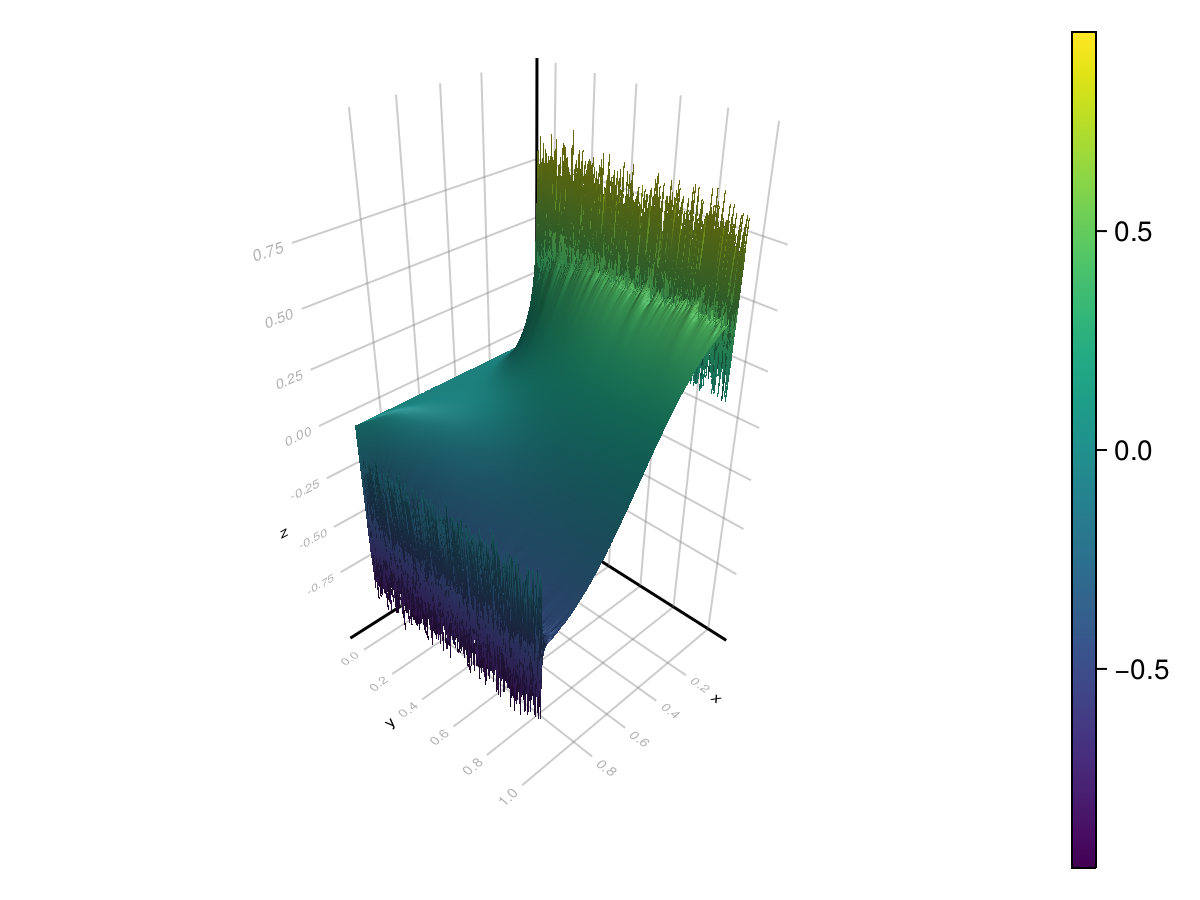

CairoMakie.Screen{IMAGE}


In [8]:
fig, ax, sf = CairoMakie.surface(burger.xspan, burger.tspan, Xhold)
CairoMakie.Colorbar(fig[1,2],sf)
display(fig)

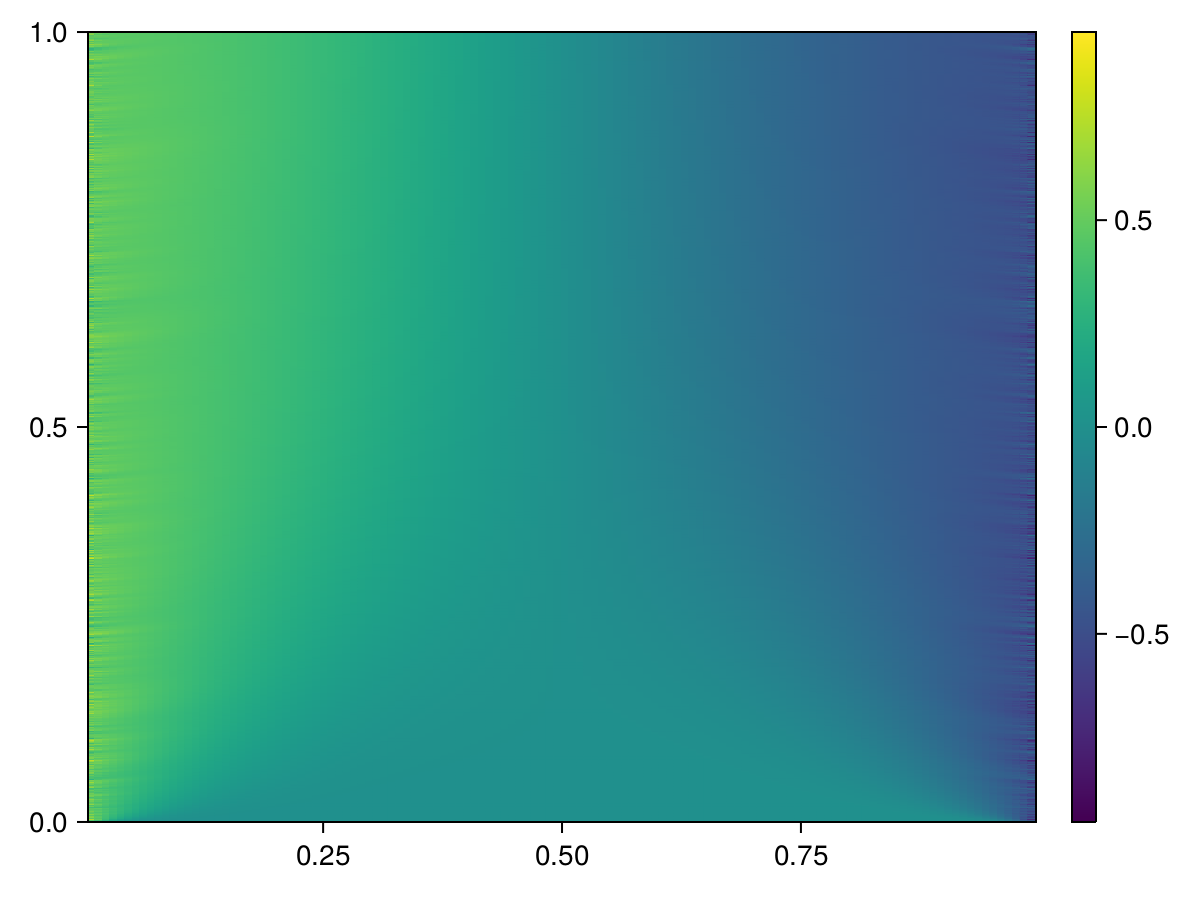

CairoMakie.Screen{IMAGE}


In [6]:
fig, ax, hm = CairoMakie.heatmap(burger.xspan, burger.tspan, Xhold)
CairoMakie.Colorbar(fig[1,2], hm)
display(fig)

### Energy Level of Singular-Values

In [10]:
nice_orders_all = Vector{Vector{Int}}(undef, burger.param_dim)
energy_level_all = Vector{Vector{Float64}}(undef, burger.param_dim)

for i in 1:length(burger.diffusion_coeffs)
    nice_orders_all[i], energy_level_all[i] = LnL.choose_ro(Σr[i]; en_low=-12)
end
nice_orders = Int.(round.(mean(nice_orders_all)))
energy_level = mean(energy_level_all)
;

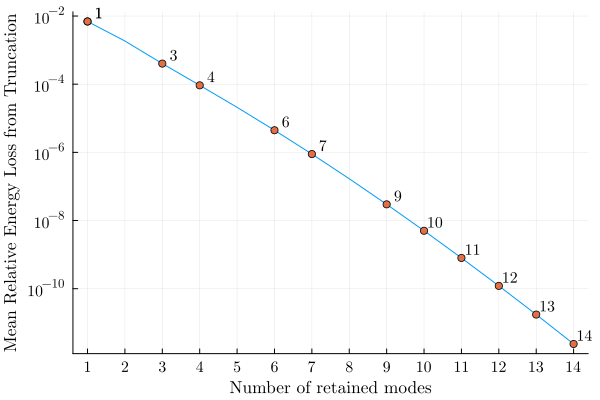

In [13]:
Plots.plot(energy_level[1:nice_orders[end]], yaxis=:log10, label="", fontfamily="Computer Modern",
    ylabel="Mean Relative Energy Loss from Truncation", xlabel="Number of retained modes", legend=:topright)
Plots.plot!(nice_orders, energy_level[nice_orders], seriestype=:scatter, label=nothing)
for i in 1:length(nice_orders)
    Plots.annotate!([(nice_orders[i]+0.3, energy_level[nice_orders[i]], Plots.text(nice_orders[i], :bottom, 10, "Computer Modern"))])
end
Plots.yticks!(10.0 .^ (0:-2:-10))
Plots.xticks!(1:14)
Plots.plot!(fg_legend=:false)
Plots.plot!(guidefontsize=11, tickfontsize=10,  legendfontsize=13)

## Results

In [14]:
proj_err = mean(proj_err, dims=2)
intru_state_err = mean(intru_state_err, dims=2)
intru_output_err = mean(intru_output_err, dims=2)
opinf_state_err = mean(opinf_state_err, dims=2)
opinf_output_err = mean(opinf_output_err, dims=2)

cutoff = 1:16

df = DataFrame(
    order=1+k:rmax,
    projection_err=vec(proj_err),
    intrusive_state_err=vec(intru_state_err),
    intrusive_output_err=vec(intru_output_err),
    inferred_state_err=vec(opinf_state_err),
    inferred_output_err=vec(opinf_output_err)
)

Row,order,projection_err,intrusive_state_err,intrusive_output_err,inferred_state_err,inferred_output_err
,Int64,Float64,Float64,Float64,Float64,Float64
1,4,0.00921231,0.0136765,0.426967,0.0135691,0.427586
2,5,0.0044898,0.00646516,0.413305,0.00640712,0.41409
3,6,0.00212554,0.00299362,0.404541,0.00297887,0.404904
4,7,0.00100187,0.00137915,0.398909,0.00138494,0.399296
5,8,0.000469675,0.000633384,0.395939,0.000658676,0.396075
6,9,0.000220048,0.000290757,0.395146,0.000328745,0.395255
7,10,0.000103395,0.000134148,0.396274,0.000193029,0.396102
8,11,4.86675e-5,6.21344e-5,0.399116,0.000139472,0.398501
9,12,2.28696e-5,2.8813e-5,0.40285,0.000136435,0.402371


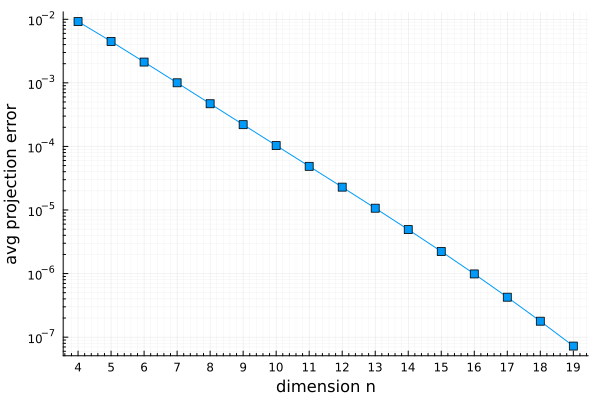

In [15]:
# Projection error
Plots.plot(df.order[cutoff], df.projection_err[cutoff], marker=(:rect))
Plots.plot!(yscale=:log10, majorgrid=true, minorgrid=true, legend=false)
tmp = log10.(df.projection_err)
Plots.yticks!([10.0^i for i in floor(minimum(tmp))-1:ceil(maximum(tmp))+1])
Plots.xticks!(df.order)
Plots.xlabel!("dimension n")
Plots.ylabel!("avg projection error")

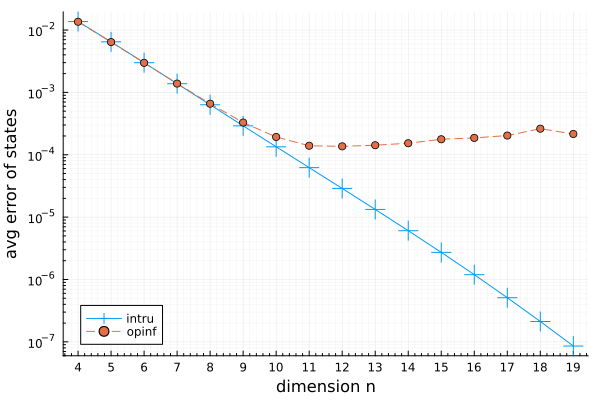

In [16]:
# State errors
Plots.plot(df.order[cutoff], df.intrusive_state_err[cutoff], marker=(:cross, 10), label="intru")
Plots.plot!(df.order[cutoff], df.inferred_state_err[cutoff], marker=(:circle), ls=:dash, label="opinf")
Plots.plot!(yscale=:log10, majorgrid=true, minorgrid=true)
tmp = log10.(df.intrusive_state_err)
Plots.yticks!([10.0^i for i in floor(minimum(tmp))-1:ceil(maximum(tmp))+1])
Plots.xticks!(df.order)
Plots.xlabel!("dimension n")
Plots.ylabel!("avg error of states")
Plots.plot!(legend=:bottomleft)

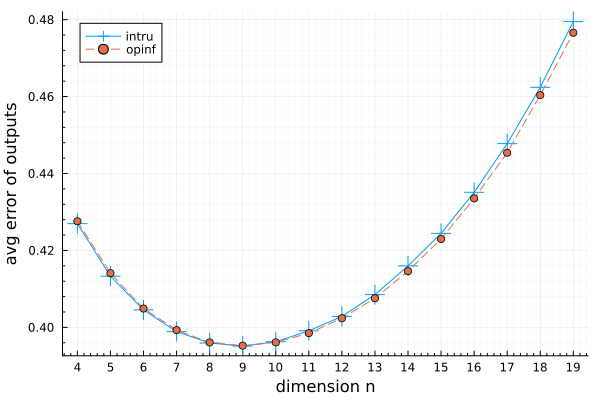

In [17]:
# Output errors
Plots.plot(df.order[cutoff], df.intrusive_output_err[cutoff], marker=(:cross, 10), label="intru")
Plots.plot!(df.order[cutoff], df.inferred_output_err[cutoff], marker=(:circle), ls=:dash, label="opinf")
Plots.plot!(majorgrid=true, minorgrid=true, legend=:topleft)
Plots.xticks!(df.order)
Plots.xlabel!("dimension n")
Plots.ylabel!("avg error of outputs")